In [106]:
import sqlite3

import numpy as np

# Creating connection to a .sqlite3 db. This will create the file when the script runs for the first time
conn = sqlite3.connect('db_big.sqlite3')
# Taking the cursor
c = conn.cursor()

Getting the Postcodes with highest total violations

In [107]:
c.execute('''select inspection.facility_zip,  sum(violation.points) s from inspection join  violation on
inspection.serial_number = violation.serial_number
where inspection.activity_date between date('2015-07-01') and date('2017-12-31') group by inspection.facility_zip order by  s desc limit 10;''')

top_post_codes = c.fetchall()

Plotting violations per month from 2015-07-01 to '2017-12-31' for the top post codes

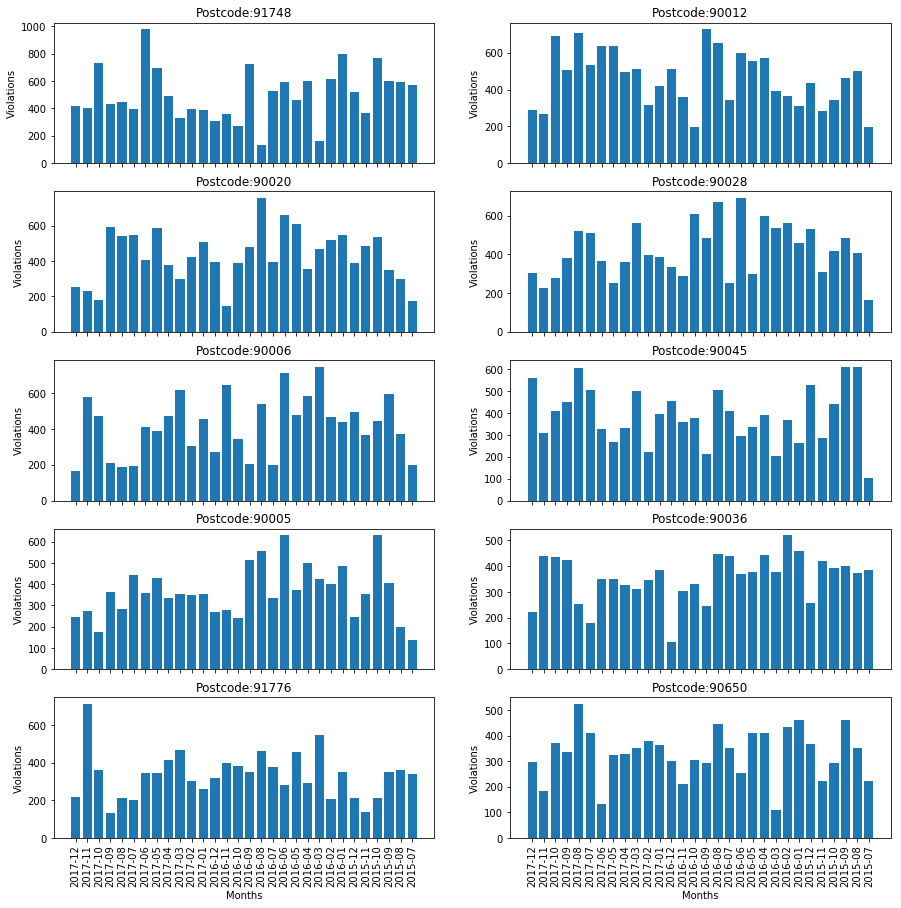

In [139]:
from matplotlib import pyplot as plt

months = ['2017-12', '2017-11', '2017-10', '2017-09', '2017-08', '2017-07',
       '2017-06', '2017-05', '2017-04', '2017-03', '2017-02', '2017-01',
       '2016-12', '2016-11', '2016-10', '2016-09', '2016-08', '2016-07',
       '2016-06', '2016-05', '2016-04', '2016-03', '2016-02', '2016-01',
       '2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07']

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15), sharex='col')

plt.setp(axs, xticks=range(30), xticklabels=months)

for ax, post_code in zip(axs.flat,top_post_codes):
    postcode = post_code[0]
    c.execute('''select strftime("%Y-%m",inspection.activity_date) d, sum(violation.points)
    from inspection join  violation on inspection.serial_number = violation.serial_number
    where inspection.activity_date between date('2015-07-01') and date('2017-12-31') and inspection.facility_zip ={}
    group by d order by d desc;'''.format(postcode))

    violation_avgs = c.fetchall()

    violation_avgs = np.asarray(violation_avgs)

    y = violation_avgs[:,1].astype(np.float32)
    
    ax.bar(range(30),y)
    ax.set_title('Postcode:{}'.format(postcode))
    ax.set(ylabel='Violations')
    
axs[4][0].set(xlabel="Months")
axs[4][1].set(xlabel="Months")
for tick in axs[4][0].get_xticklabels():
    tick.set_rotation(90)
    
for tick in axs[4][1].get_xticklabels():
    tick.set_rotation(90)


    

plt.show()

array(['2017-12', '2017-11', '2017-10', '2017-09', '2017-08', '2017-07',
       '2017-06', '2017-05', '2017-04', '2017-03', '2017-02', '2017-01',
       '2016-12', '2016-11', '2016-10', '2016-09', '2016-08', '2016-07',
       '2016-06', '2016-05', '2016-04', '2016-03', '2016-02', '2016-01',
       '2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07'],
      dtype='<U7')

In [66]:
a1=array([0,0,0,0,0])
a2=array([1,2,3])

In [64]:
a1=a2

In [70]:
np.put(a1, range(3),a2)

In [71]:
a1

array([1, 2, 3, 0, 0])